# Explainer notebook
This notebook answers the following questions (in the Table of Contents) related to our final assignment in **Social data analysis and visualization (02806)** Spring 2024.

The website with our visualizations and accompanying text can be found on: [Medium]()    

The website for the first part of this assignment can be found here : [Project Assignment A](https://clbokea.github.io/)

The Video presentation (Final Assignment A) can be found here: [Final Assignment A](https://youtu.be/EhA7oQtZ5dY)

## Table of Contents
* Motivation
    * What is your dataset?
    * Why did you choose this/these particular dataset(s)?
    * What was your goal for the end user's experience?
* Basic stats
    * Write about your choices in data cleaning and preprocessing
    * Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
* Data Analysis
    * Describe your data analysis and explain what you've learned about the dataset.
    * If relevant, talk about your machine-learning.
    * Genre. Which genre of data story did you use?
    * Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
    * Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?
* Visualizations.
    * Explain the visualizations you've chosen.
    * Why are they right for the story you want to tell?
* Discussion. 
    * What went well?,
    * What is still missing? What could be improved?, Why?
* Contributions. 

In [3]:
# Setup of notebook
import os
import json
import numpy as np 
import pandas as pd
print('Setup complete!')

Setup complete!


## Motivation

### What is your dataset?

Our dataset consists of data collected from a Garmin watch worn on the wrist for the past three years. Additionally, we have correlated the quantitative data from the Garmin with qualitative data extracted from a personal diary, and from and app ([HowWeFeelEmotions](https://howwefeel.org/)) tracking how we fell on specific times.

A list of the data sources used can be seen here:

* Garmin watch health data (stress levels, resting heart rate)
* Garmin watch activities (running) data (distance/time, vo2max),
* Garmin watch sleep data (total, REM, light, deep, awake)
* Sick days and lecturing days added
* Emotions from [HowWeFeelEmotions](https://howwefeel.org/) app
* (Emotion from a textual analysis of my journal)

The files used from the Garmin Dataset are as follows:

In [4]:
garmin_base_dir = "../files/Garmin_20241403"
folder = os.path.join(garmin_base_dir, "DI_CONNECT", "DI-Connect-Aggregator")
os.listdir(folder)

['HydrationLogFile_2021-03-10_2021-06-18.json',
 'UDSFile_2012-09-14_2012-12-23.json',
 'UDSFile_2011-05-03_2011-08-11.json',
 'UDSFile_2011-08-11_2011-11-19.json',
 'HydrationLogFile_2021-09-26_2022-01-04.json',
 'UDSFile_2022-07-24_2022-11-01.json',
 'HydrationLogFile_2022-01-04_2022-04-14.json',
 'HydrationLogFile_2021-06-18_2021-09-26.json',
 'HydrationLogFile_2023-08-27_2023-12-05.json',
 'UDSFile_2022-11-01_2023-02-09.json',
 'UDSFile_2023-08-28_2023-12-06.json',
 'HydrationLogFile_2020-08-22_2020-11-30.json',
 'HydrationLogFile_2020-05-14_2020-08-22.json',
 'HydrationLogFile_2022-04-14_2022-07-23.json',
 'UDSFile_2005-11-10_2006-02-18.json',
 'HydrationLogFile_2023-05-19_2023-08-27.json',
 'UDSFile_2014-08-15_2014-11-23.json',
 'UDSFile_2014-01-27_2014-05-07.json',
 'HydrationLogFile_2023-02-08_2023-05-19.json',
 'HydrationLogFile_2022-07-23_2022-10-31.json',
 'UDSFile_2021-09-27_2022-01-05.json',
 'UDSFile_2013-07-11_2013-10-19.json',
 'UDSFile_2022-01-05_2022-04-15.json',
 'Hy

(DEL) We have then read the content from all files and put them into one DataFrame

In [12]:
#(DEL)
# Setting up paths and configurations
garmin_base_dir = "../files/Garmin_20241403"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", "DI-Connect-Aggregator")
columns_of_interest = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'restingCaloriesFromActivity', 
                       'totalSteps', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'allDayStress', 'bodyBattery']

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.startswith('UDS') and f.endswith('.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        filtered_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year, columns_of_interest]
        return filtered_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
focus_df = load_and_filter_json(di_connect_path)
#focus_df.columns

### Why did you choose this/these particular dataset(s)?

Our primary objective has been to craft an article for publication on "Medium" that delves into the insights obtainable from one's personal Garmin Data. Accordingly, our narrative centers around a personal story rather than a broad analysis applicable to humanity at large. This means we opted not to examine datasets from a wide range of individuals but focused exclusively on the detailed tracking data of one specific person. In essence, our aim was not to extrapolate general conclusions about health data from a large population, but rather to explore a distinctly personal perspective.


### What was your goal for the end user's experience?


Your primary objective has been to inspire readers of our article to explore their personal data in ways that might not be immediately apparent to everyone. We have focused on a narrative that emphasizes personal stories to infuse the article with energy, inspiration, and creativity. Our hope is that this approach will resonate with readers in a way that encourages them to delve deeper into their own data and to approach they own life and issues in a sientific way.

## Basic stats.

### Write about your choices in data cleaning and preprocessing
We have previously discussed the specific data and files we chose to work with, but in more details the process involved looping through all available files to create a dataframe containing each file's content, and then dispalying the datas 5 first rows. Most of the files did not contain relevant data for our purposes, however, the files in the "DI-Connect-Aggregator" folder provided daily health data, and those in the "DI-Connect-Wellness" folder contained sleep data, which were our primary focus.

We selected 22 JSON files from the "DI-Connect-Aggregator" folder and merged the data from these files into a single dataframe. We excluded all data prior to 2020, as the watch was not worn before this period.

### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

One of our initial interests was to see the sleep patterns and the stress levels over time, and to see if any kind of initial insigt would occour by just looking at the plots.

In [6]:
folder = "DI-Connect-Wellness"
di_connect_path = os.path.join(garmin_base_dir, "DI_CONNECT", folder)

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(path, start_year=2020):
    all_dfs = []
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('sleepData.json')]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            all_dfs.append(df)

    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        filtered_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year]
        return filtered_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded

# Apply the function and display the resulting DataFrame
sleep_df = load_and_filter_json(di_connect_path)
#sleep_df

In [7]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
import pandas as pd

# Ensure the output is in the notebook
output_notebook()

# Convert 'calendarDate' to datetime if it's not already
sleep_df['calendarDate'] = pd.to_datetime(sleep_df['calendarDate'])

# Prepare the data source
source = ColumnDataSource(data={
    'date': sleep_df['calendarDate'],
    'deep': sleep_df['deepSleepSeconds'] / 3600,  # Convert seconds to hours
    'light': sleep_df['lightSleepSeconds'] / 3600,
    'rem': sleep_df['remSleepSeconds'] / 3600
})

# Create a new plot with a title and axis labels
p = figure(title="Sleep Data Over Time", x_axis_label='Date', y_axis_label='Hours of Sleep', x_axis_type='datetime',
          width=900, height=600)

# Add lines to the plot
p.line(x='date', y='deep', line_width=2, color='red', legend_label='Deep Sleep', source=source)
p.line(x='date', y='light', line_width=2, color='green', legend_label='Light Sleep', source=source)
p.line(x='date', y='rem', line_width=2, color='blue', legend_label='REM Sleep', source=source)

# Add hover tool
hover = HoverTool()
hover.tooltips=[
    ('Date', '@date{%F}'),
    ('Deep Sleep', '@deep hours'),
    ('Light Sleep', '@light hours'),
    ('REM Sleep', '@rem hours')
]
hover.formatters={'@date': 'datetime'}
p.add_tools(hover)

# Show the result
show(p)


Loading BokehJS ...

Even though the plot did not show as much details it gave us an idea that especially the deep sleep patterns in some periods seeamed to be less.

Wanting to investigate the stress levels one initial thought was to look at the heart rate. 

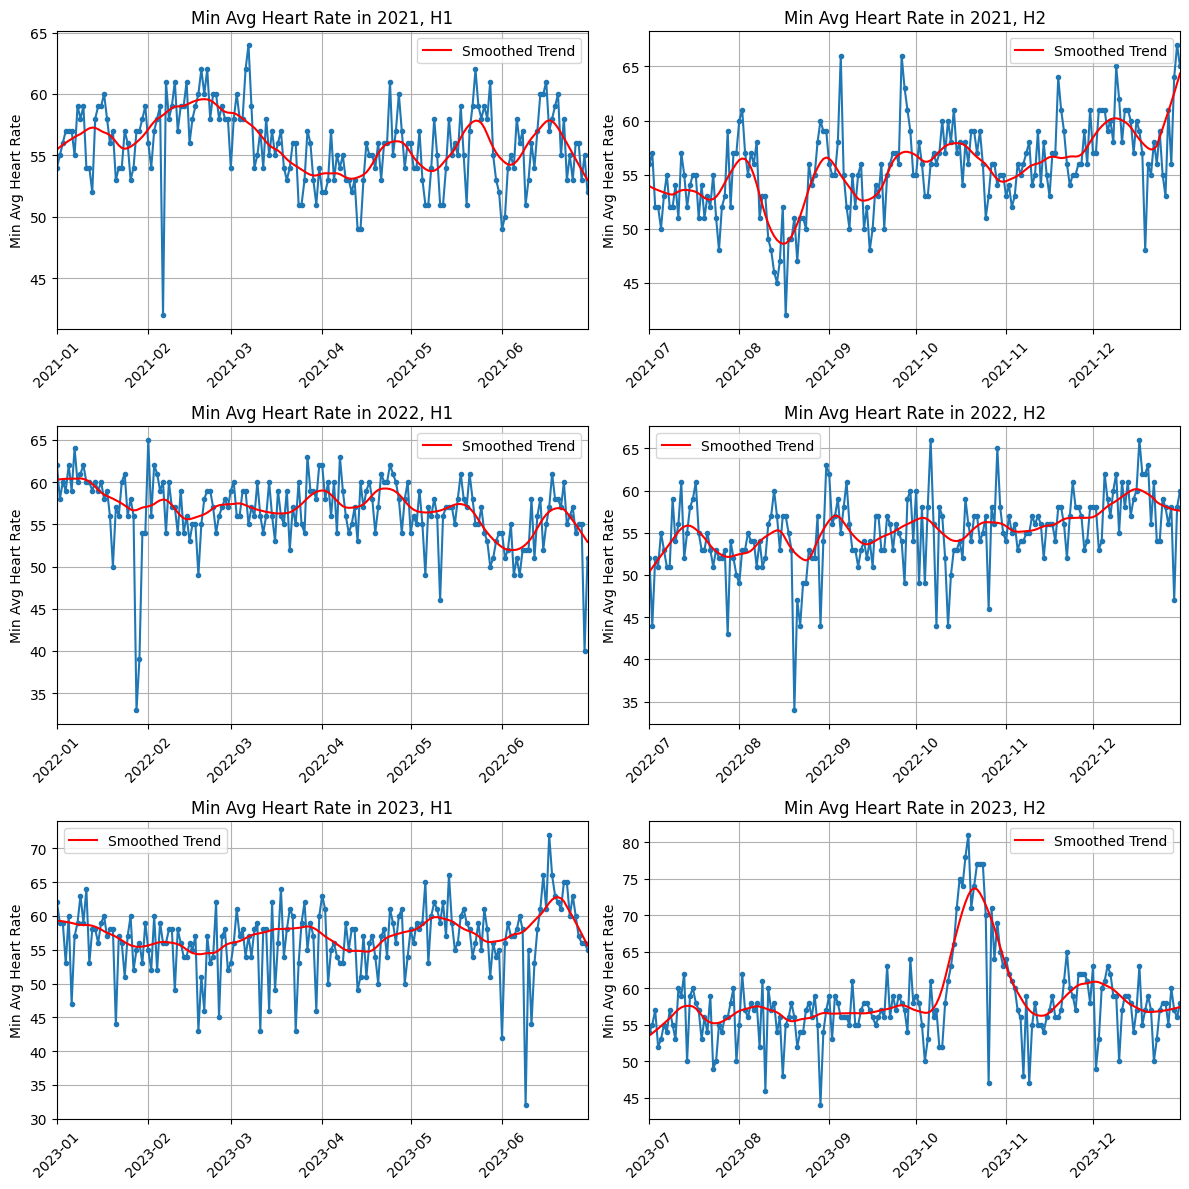

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.dates as mdates

# Assuming 'calendarDate' and 'AverageStressLevel' are in your DataFrame
focus_df['calendarDate'] = pd.to_datetime(focus_df['calendarDate'])  # Ensure this column is datetime if not already

#only the years of 2021-2023
focus_df = focus_df[focus_df['calendarDate'] >= '2021-01-01']  
focus_df = focus_df[focus_df['calendarDate'] <= '2023-12-31']  

focus_df['year'] = focus_df['calendarDate'].dt.year  # Extract year from date for grouping
focus_df['half'] = (focus_df['calendarDate'].dt.month - 1) // 6 + 1  # Determine the half of the year

# Prepare subplots
years = focus_df['year'].unique()
years.sort()
halfs = [1, 2]  # Two halves in a year
fig, axes = plt.subplots(nrows=len(years), ncols=2, figsize=(12, 4 * len(years)))  # One row per year, two columns for each half
axes = axes.ravel()

plot_index = 0
for year in years:
    for half in halfs:
        ax = axes[plot_index]
        half_data = focus_df[(focus_df['year'] == year) & (focus_df['half'] == half)]

        if half_data.empty:
            ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(f"No Data in {year}, H{half}")
            ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31')])
        else:
            # Plot raw data as a line plot
            ax.plot(half_data['calendarDate'], half_data['minAvgHeartRate'], marker='.', linestyle='-')
            
            # Ensure that the calendarDate is converted to numeric for lowess smoothing
            numeric_dates = mdates.date2num(half_data['calendarDate'])
            
            # Lowess smoothing
            smoothed = lowess(half_data['minAvgHeartRate'], numeric_dates, frac=0.1)
            ax.plot(mdates.num2date(smoothed[:, 0]), smoothed[:, 1], 'r-', label='Smoothed Trend')
            
            ax.set_title(f"Min Avg Heart Rate in {year}, H{half}")
            ax.set_ylabel('Min Avg Heart Rate')
            ax.grid(True)
            
            # Set x-axis major locator to month starts and formatter to year-month format
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Set x-axis limits based on the half
            if half == 1:
                ax.set_xlim([pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-06-30')])
            else:
                ax.set_xlim([pd.Timestamp(f'{year}-07-01'), pd.Timestamp(f'{year}-12-31')])

            # Rotate date labels
            plt.setp(ax.get_xticklabels(), rotation=45)

            ax.legend()
        
        plot_index += 1

plt.tight_layout()
plt.show()


Even though relatively stable, some areas had both lower and higher hart rates, which could indicate that something happend that also could be of our interest.

## Data Analysis



### Describe your data analysis and explain what you've learned about the dataset.


We ended up looking primarily on data that could describe the stress levels and data related to that.    
Initially we explored the Strees levels per semester (jan-jun, jul-dec). We related this to the diary stating the key events of the semester. The results can be seen below.

What did we learn: Lenkas Stress levels seeams to be related to social activities. The activity of teaching seeams to be the most stressfull of the ones listed. 

**Project 1: Compare stress levels to different time periods**

In [24]:
# I got this data via a script for downloading directly through garminconnect
health_df = pd.read_csv('GarminHealth.csv')
health_df = health_df[['Date', 'resting_HR', 'average_stress', 'sleeping_hours']]
health_df

,Date,resting_HR,average_stress,sleeping_hours
0,2021-07-01,60,30,7.716667
1,2021-07-02,60,25,6.200000
2,2021-07-03,59,30,6.633333
3,2021-07-04,60,22,8.416667
4,2021-07-05,57,23,6.633333
...,...,...,...,...
1365,2024-03-27,58,22,9.100000
1366,2024-03-28,58,27,2.233333
1367,2024-03-29,59,27,5.950000
1368,2024-03-30,60,43,9.316667


**Time series average stress per semester**

In [25]:
health_df['Date'] = pd.to_datetime(health_df['Date'])

# Set the date column as the index
health_df.set_index('Date', inplace=True)
# Define custom labels and colors
labels_colors = {
    "2021 - 1st": ("Finishing my MSc in astrophysics", "black"),
    "2021 - 2nd": ("Novo Nordisk", "blue"),
    "2022 - 1st": ("Novo Nordisk", "blue"),
    "2022 - 2nd": ("KEA, free bird", "red"),
    "2023 - 1st": ("KEA, teaching here and there", "darkred"),
    "2023 - 2nd": ("KEA, system development ITA", "maroon"),
    "2024 - 1st": ("KEA, free bird", "red")
}
# Define semesters and add them to the df
health_df['Semester'] = (health_df.index.month - 1) // 6 + 1  # Jan-Jun will be 1, Jul-Dec will be 2

# Create a year-semester identifier, like "2021 - 1st", "2021 - 2nd"
health_df['YearSemester'] = health_df.index.year.astype(str) + ' - ' + health_df['Semester'].replace({1: '1st', 2: '2nd'})

# Group by this new identifier
semester_stress = health_df.groupby('YearSemester')['average_stress'].mean()
semester_restHR = health_df.groupby('YearSemester')['resting_HR'].mean()

## Flag days

#Sick: October 12-30 2023

#And alcohol? No idea ... 
# Initialize the 'Sick' column to False
health_df['Sick'] = False

# Set 'Sick' to True for the specific date ranges#health_df.loc['2023-10-12':'2023-10-30', 'Sick'] = True

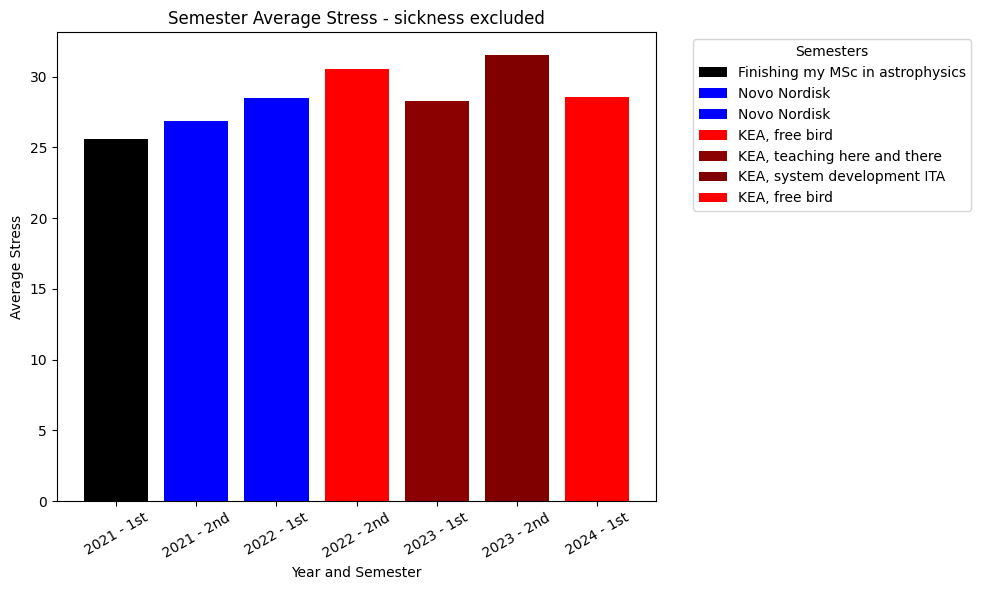

In [27]:
filtered_df = health_df[health_df['Sick'] == False]

# Now calculate the mean stress without including sick days
semester_stress_exclude_sick = filtered_df.groupby('YearSemester')['average_stress'].mean()

# Plotting stress levels
fig, ax = plt.subplots(figsize=(10, 6))
for index, value in semester_stress_exclude_sick.items():
    color = labels_colors[index][1]
    label = labels_colors[index][0]
    bar = ax.bar(index, value, color=color, label=label)

plt.title('Semester Average Stress - sickness excluded')
plt.xlabel('Year and Semester')
plt.ylabel('Average Stress')
plt.xticks(rotation=30)

# Handling the legend to display it outside the plot
plt.legend(title='Semesters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend outside of the plot
plt.tight_layout()

plt.show()


### If relevant, talk about your machine-learning.
not relevant (TO BE DEL)

### Genre. Which genre of data story did you use?
Our chosen genre aligns with the magazine-style approach. Additionally, we have expanded this style to fit a more "Data Diary" approach. We have also chosen to tell the story in first person, giving it a more personal touch and, hopefully, making it more engaging for the reader.

### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?


### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## Visualizations.

### Explain the visualizations you've chosen.


### Why are they right for the story you want to tell?
The story´s aim is to comminicate data to readers with out any prior knowlege to datavisualisation. The bar charts has this abillity to easially to comminicate the main points in an easy to understad way. 
Diffenrent chart often has to be explained in order for people to understand the message. 

## Discussion. 
Think critically about your creation
* What went well?,
* What is still missing? What could be improved?, Why?

## Contributions. 
Who did what?
* You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
* It is not OK simply to write "All group members contributed equally".

Main responcibillities

**Magdalene Maria Otap**
* Medium article and Storyline

**Claus Bové**
* Explainer Notebook

## Make sure that you use references when they're needed and follow academic standards.




.









